# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import sklearn


%matplotlib inline

In [5]:
df = pd.read_csv('df_dummy-mod7.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    6770 non-null   int64  
 1   posse_de_veiculo                        6770 non-null   int64  
 2   posse_de_imovel                         6770 non-null   int64  
 3   qtd_filhos                              6770 non-null   int64  
 4   idade                                   6770 non-null   float64
 5   tempo_emprego                           6770 non-null   float64
 6   possui_celular                          6770 non-null   int64  
 7   possui_fone_comercial                   6770 non-null   int64  
 8   possui_fone                             6770 non-null   int64  
 9   possui_email                            6770 non-null   int64  
 10  qt_pessoas_residencia                   6770 non-null   floa

In [6]:
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,0,58.832877,3.106849,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1,0,1,0,52.356164,8.358904,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
2,0,1,1,0,46.224658,2.106849,1,1,1,1,...,1,0,0,0,0,1,0,0,0,0
3,1,1,0,0,29.230137,3.021918,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,1,0,27.482192,4.024658,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [7]:
y = df.mau
y

,mau
0,0
1,0
2,0
3,0
4,0
...,...
6765,1
6766,1
6767,1
6768,1


In [8]:
X = df.drop('mau', axis=1)
X

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,0,58.832877,3.106849,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1,0,1,0,52.356164,8.358904,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
2,0,1,1,0,46.224658,2.106849,1,1,1,1,...,1,0,0,0,0,1,0,0,0,0
3,1,1,0,0,29.230137,3.021918,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,1,0,27.482192,4.024658,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,1,0,1,1,34.857534,3.101370,1,1,1,0,...,0,0,1,0,0,1,0,0,0,0
6766,1,0,1,0,54.109589,9.884932,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6767,1,0,1,0,43.389041,7.380822,1,1,1,0,...,1,0,0,0,0,1,0,0,0,0
6768,0,1,1,0,30.005479,9.800000,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [10]:
clf = tree.DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train, y_train)

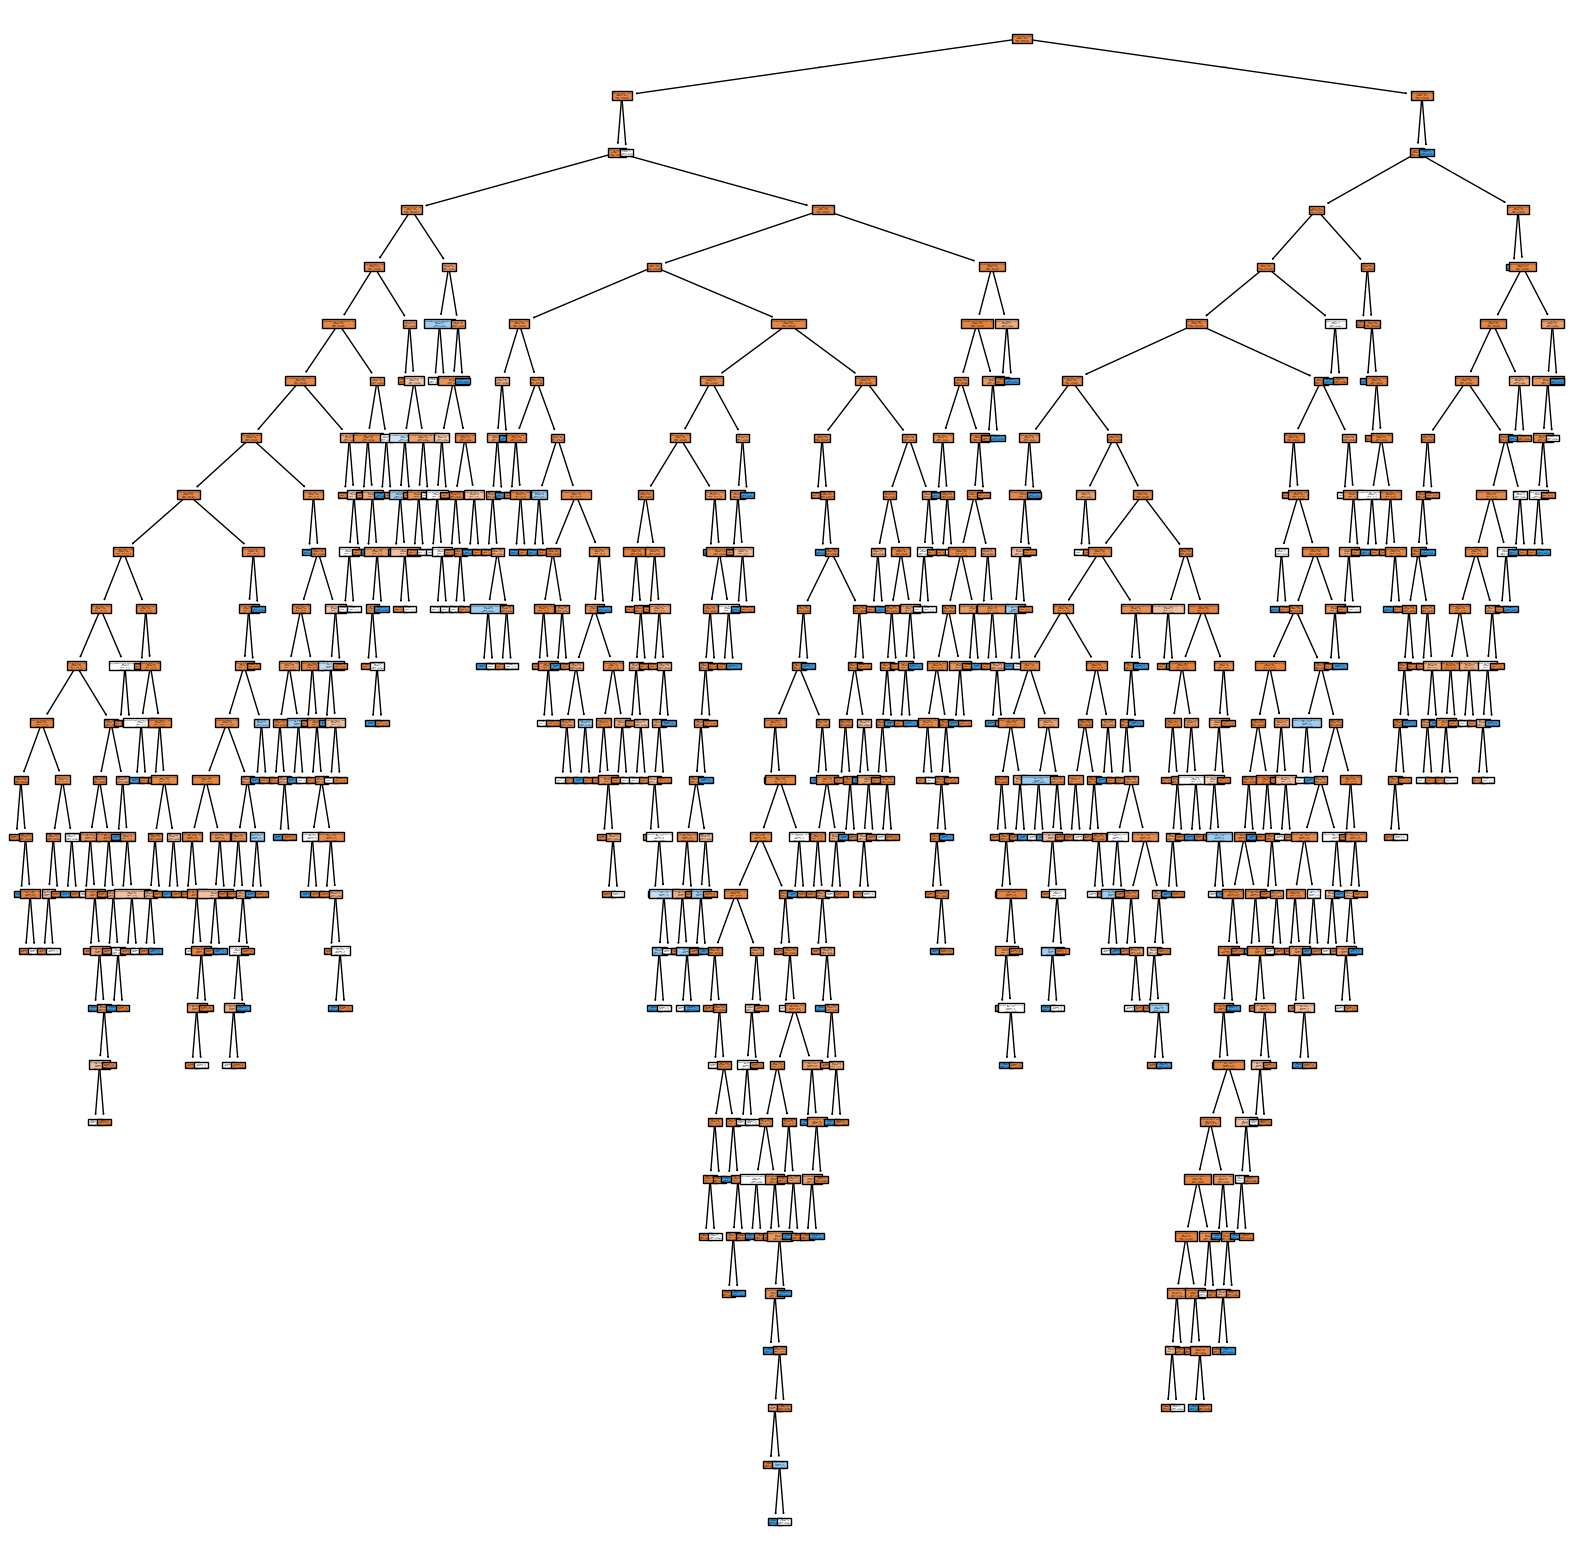

In [11]:
plt.figure(figsize=(20, 20))
tree.plot_tree(clf,
          filled=True,
          class_names=['Aprovado', 'Reprovado'],
          feature_names=X.columns);

Acurácia (Train): 98.52%


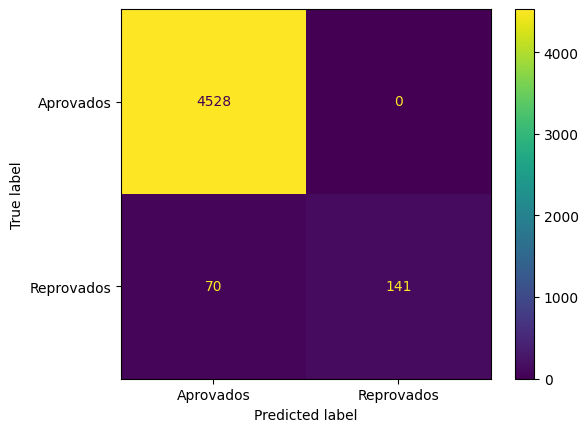

In [12]:
y_predict_train = clf.predict(X_train)



cm = confusion_matrix(y_train, y_predict_train)



disp_train = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])



disp_train.plot()



print(f'Acurácia (Train): {round(accuracy_score(y_train, y_predict_train) * 100, 2)}%')

In [13]:
accuracy_score(y_train, y_predict_train)

0.9852289512555391

In [14]:
acuracia = ((4528)+(141))/(4528+141+70)
accuracy_score(y, predict)

NameError: name 'predict' is not defined

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [15]:
clf_t = tree.DecisionTreeClassifier(random_state=100)
clf_t = clf_t.fit(X_test, y_test)

Acurácia (Train): 99.46%


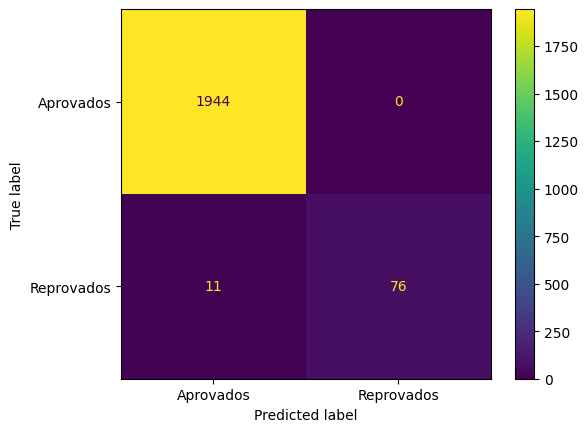

In [16]:
y_predict_test = clf_t.predict(X_test)



cm = confusion_matrix(y_test, y_predict_test)



disp_train = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])



disp_train.plot()



print(f'Acurácia (Train): {round(accuracy_score(y_test, y_predict_test) * 100, 2)}%')

In [17]:
accuracy_score(y_test, y_predict_test)

0.9945839487936977

In [18]:
acuracia = ((1944)+(76))/(1944+76+11)
accuracy_score(y, predict)

NameError: name 'predict' is not defined

In [19]:
X_train.shape

(4739, 32)

In [20]:
tree_model = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
tree_model.fit(X_train, y_train)


y_pred = tree_model.predict(X_test)


print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Matriz de Confusão:
[[1937    7]
 [  87    0]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1944
           1       0.00      0.00      0.00        87

    accuracy                           0.95      2031
   macro avg       0.48      0.50      0.49      2031
weighted avg       0.92      0.95      0.93      2031



In [21]:
prop_maus = np.mean(y_pred == 1)
print(f"\nProporção de contratos classificados como 'maus': {prop_maus:.4f}")

y_pred_bons = np.full_like(y_test, 0)
acc_bons = accuracy_score(y_test, y_pred_bons)
print(f"\nAcurácia classificando todos como 'bons': {acc_bons:.4f}")



Proporção de contratos classificados como 'maus': 0.0034

Acurácia classificando todos como 'bons': 0.9572
